# High Dynmaic Range (HDR) Imaging

**Satya Mallick, LearnOpenCV.com**

!["HDR Image Example"](high-dynamic-range-hdr.jpg)

# Basic Idea

1. The **dynamic range** of images is limited to 8-bits (0 - 255) per channel
2. Very bright pixels saturate to 255
3. Very dark pixels clip to 0

# Step 1: Capture Multiple Exposures

!["HDR Image Sequence"](hdr-image-sequence.jpg)


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def readImagesAndTimes():
  # List of file names  
  filenames = ["img_0.033.jpg", "img_0.25.jpg", "img_2.5.jpg", "img_15.jpg"]
  
  # List of exposure times  
  times = np.array([ 1/30.0, 0.25, 2.5, 15.0 ], dtype=np.float32)
  
  # Read images 
  images = []
  for filename in filenames:
    im = cv2.imread(filename)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    images.append(im)
  
  return images, times


# Step 2: Align Images

![Aligned vs. Unaligned](aligned-unaligned-hdr-comparison.jpg)

In [2]:
# Read images and exposure times
images, times = readImagesAndTimes()

# Align Images
alignMTB = cv2.createAlignMTB()
alignMTB.process(images, images)

# Step 3: Estimate Camera Response Function

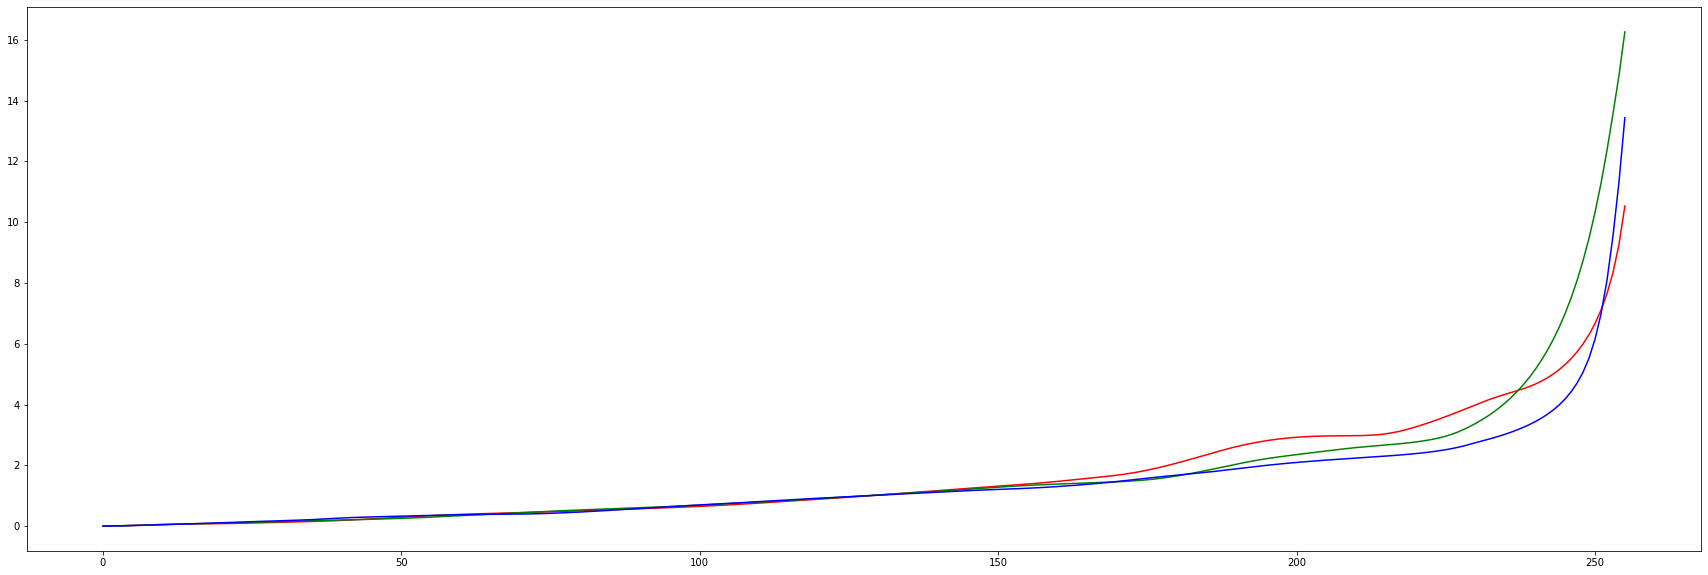

In [3]:
# Find Camera Response Function (CRF)
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, times)

# Plot CRF
x = np.arange(256, dtype=np.uint8)
y = np.squeeze(responseDebevec)

plt.figure(figsize=(30,10))
plt.plot(x, y[:,0],'r'  , x, y[:,1],'g', x, y[:,2],'b');

# Step 4: Merge Exposure into an HDR Image

In [4]:
# Merge images into an HDR linear image
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, times, responseDebevec)

# Step 5: Tonemapping 

Many Tonemapping algorithms are available in OpenCV. We chose Durand as it has more controls.

Tonemaping using Drago's method ... 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


saved ldr-Drago.jpg


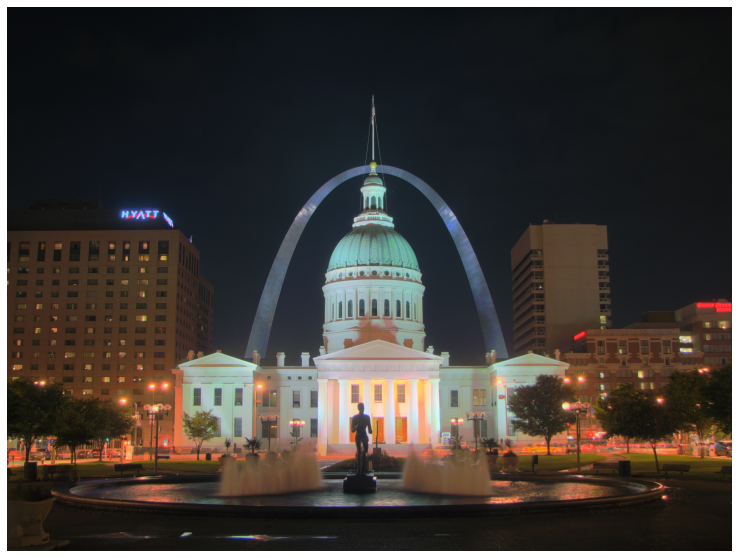

In [5]:
# Tonemap using Drago's method to obtain 24-bit color image
print("Tonemaping using Drago's method ... ")
tonemapDrago = cv2.createTonemapDrago(1.0, 0.7)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 3 * ldrDrago
#np.clip(3 * ldrDrago,0,1)
plt.figure(figsize=(20,10)); plt.imshow(ldrDrago); plt.axis('off');
cv2.imwrite("ldr-Drago.jpg", ldrDrago * 255)
print("saved ldr-Drago.jpg")


Tonemaping using Reinhard's method ... 
saved ldr-Reinhard.jpg


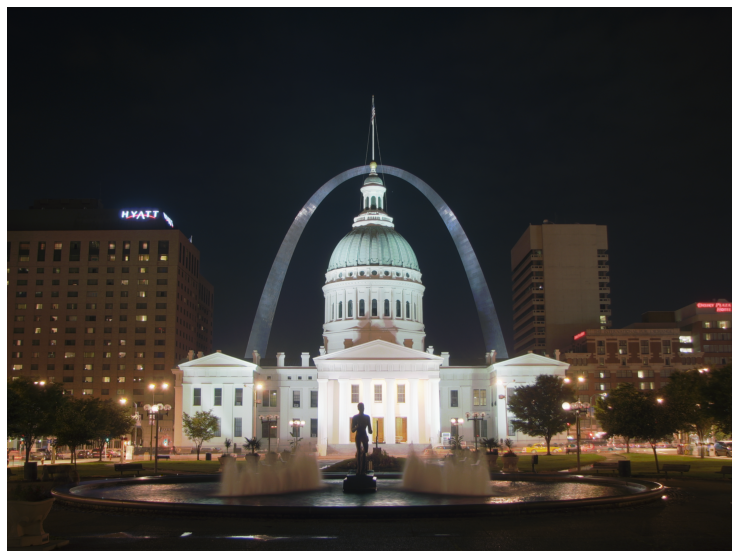

In [6]:
# Tonemap using Reinhard's method to obtain 24-bit color image
print("Tonemaping using Reinhard's method ... ")
tonemapReinhard = cv2.createTonemapReinhard(1.5, 0,0,0)
ldrReinhard = tonemapReinhard.process(hdrDebevec)
np.clip(3 * ldrReinhard,0,1)
plt.figure(figsize=(20,10)); plt.imshow(ldrReinhard); plt.axis('off');
cv2.imwrite("ldr-Reinhard.jpg", ldrReinhard * 255)
print("saved ldr-Reinhard.jpg")

Tonemaping using Mantiuk's method ... 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


saved ldr-Mantiuk.jpg


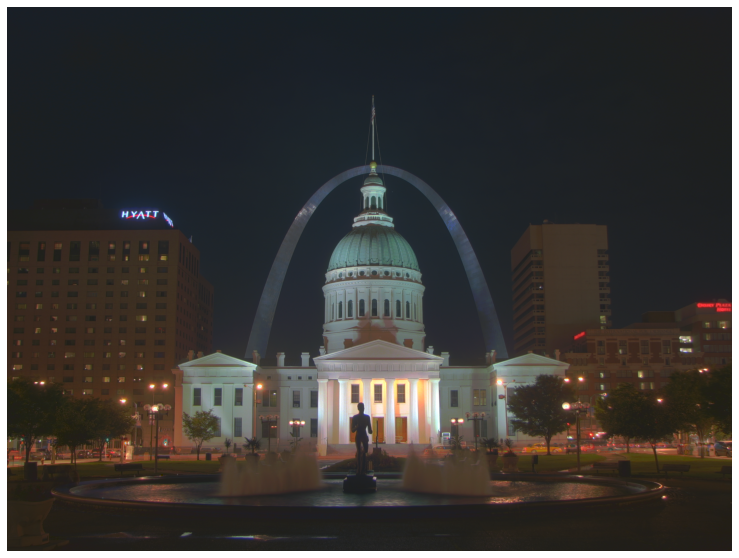

In [7]:
# Tonemap using Mantiuk's method to obtain 24-bit color image
print("Tonemaping using Mantiuk's method ... ")
tonemapMantiuk = cv2.createTonemapMantiuk(2.2,0.85, 1.2)
ldrMantiuk = tonemapMantiuk.process(hdrDebevec)
ldrMantiuk = 3 * ldrMantiuk
np.clip(3 * ldrMantiuk,0,1)
plt.figure(figsize=(20,10)); plt.imshow(ldrMantiuk); plt.axis('off');
cv2.imwrite("ldr-Mantiuk.jpg", ldrMantiuk * 255)
print("saved ldr-Mantiuk.jpg")